In [19]:
import pandas as pd

df = pd.read_json('df_sorted.json').transpose()

In [12]:
import json

with open("./data/test.json", "r") as f:
    ground_truth = json.load(f)

In [28]:
len(df["rescaled_performance_score"])

2224

In [34]:
overall_stats = {}
for issue_details in ground_truth:
    issue_counter = {}
    try:
        with open(f"./data/GroundTruthScoring/v1/{issue_details['instance_id']}.json", "r") as f:
            ai_score_details = json.load(f)
        with open(f"./data/RAG_triad_eval/v1/{issue_details['instance_id']}.json", "r") as f:
            generated_details = json.load(f)
        if issue_details['instance_id'] not in df["rescaled_performance_score"]:
            continue
        ai_score = ai_score_details['score']
        collected_data = generated_details["mayil_collected_data"]
        bouncer_score = collected_data["bouncer_response"]["score"]
        
        issue_counter['AI_Score'] = ai_score
        issue_counter['Bouncer_Score'] = bouncer_score
        issue_counter['context_relevance'] = collected_data["context_relevance"]*10
        # issue_counter['groundedness_score'] = collected_data["groundedness_score"]*10
        issue_counter['qa_relevance'] = collected_data["qa_relevance"]*10
        issue_counter['rag_score'] = df["rescaled_performance_score"][issue_details['instance_id']]

    except Exception as e:
        print(f"Error for {issue_details['instance_id']}: {e}")
        continue
    overall_stats[issue_details["instance_id"]] = issue_counter

Error for astropy__astropy-11693: [Errno 2] No such file or directory: './data/RAG_triad_eval/v1/astropy__astropy-11693.json'
Error for astropy__astropy-13842: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/astropy__astropy-13842.json'
Error for django__django-11669: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/django__django-11669.json'
Error for django__django-13128: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/django__django-13128.json'
Error for matplotlib__matplotlib-23140: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/matplotlib__matplotlib-23140.json'
Error for pydata__xarray-4683: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/pydata__xarray-4683.json'
Error for pytest-dev__pytest-11160: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/pytest-dev__pytest-11160.json'
Error for pytest-dev__pytest-7490: [Errno 2] No such file or directory: './data/GroundTruthS

                   AI_Score  Bouncer_Score  context_relevance  qa_relevance  \
AI_Score           1.000000       0.467402           0.151840      0.324157   
Bouncer_Score      0.467402       1.000000           0.174006      0.678207   
context_relevance  0.151840       0.174006           1.000000      0.122503   
qa_relevance       0.324157       0.678207           0.122503      1.000000   
rag_score          0.306847       0.204080           0.249266      0.133285   

                   rag_score  
AI_Score            0.306847  
Bouncer_Score       0.204080  
context_relevance   0.249266  
qa_relevance        0.133285  
rag_score           1.000000  


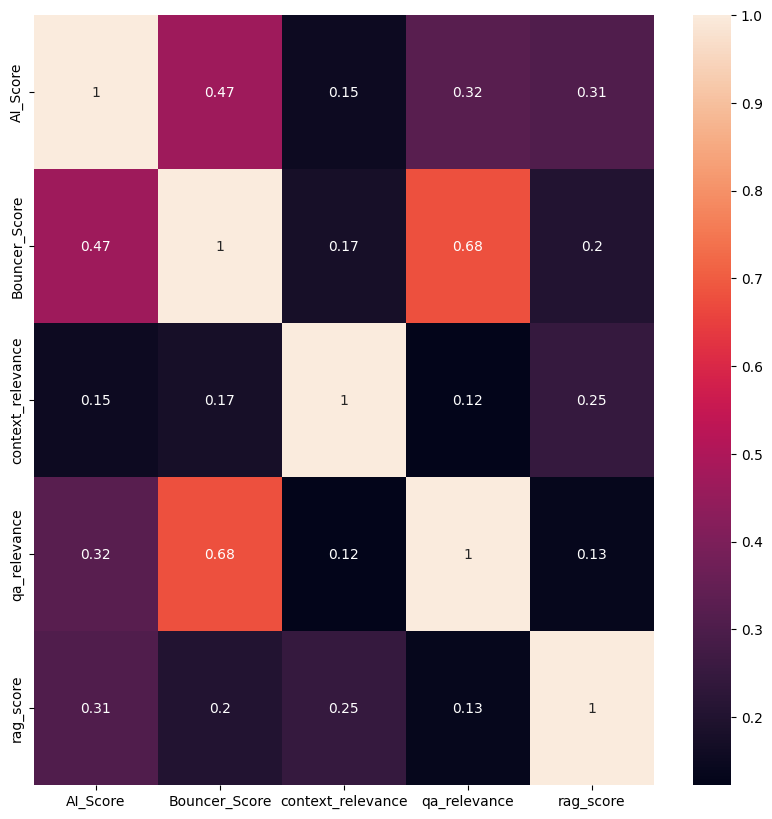

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.DataFrame.from_dict(overall_stats, orient='index')

# plot scatter of all the scores AI_Score, Bouncer_Score, context_relevance, groundedness_score, qa_relevance
# plt.figure(figsize=(10, 10))
# sns.lineplot(data=df)
# plt.show()

# show correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [34]:
len(df[df["AI_Score"] == 7])

298

In [11]:
df["AI_Score"].describe()

count    2280.000000
mean        4.061404
std         3.026097
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        10.000000
Name: AI_Score, dtype: float64

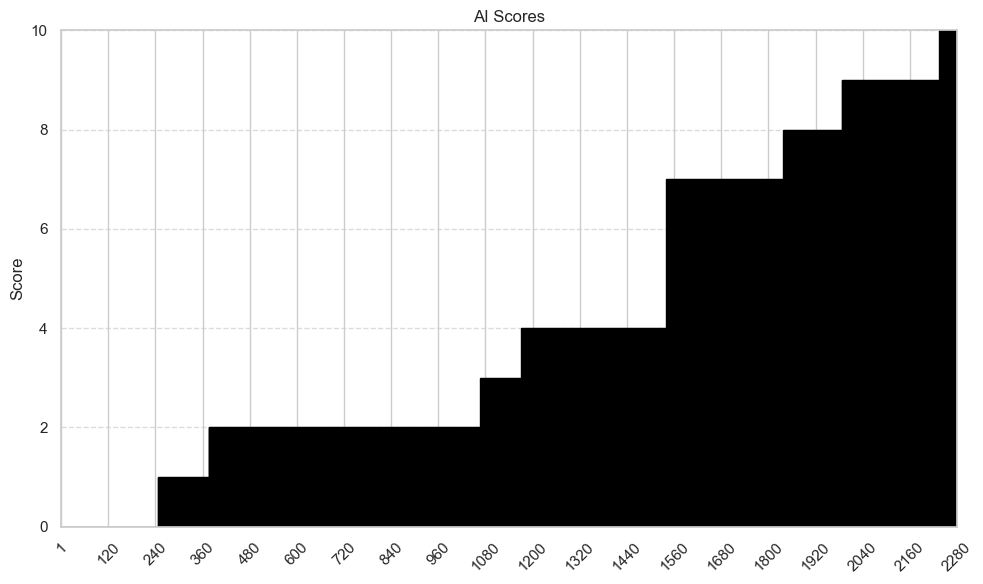

In [24]:
plt.figure(figsize=(10, 6))
sorted_df = df.sort_values('AI_Score')
sorted_df['AI_Score'].plot(kind='bar', width=1, color='skyblue', edgecolor='black')

plt.title('AI Scores')
plt.ylabel('Score')
plt.xticks([])
plt.ylim(0, 10)
plt.xticks(np.linspace(0, len(sorted_df) - 1, num=20), labels=[str(int(x)) for x in np.linspace(1, len(sorted_df), num=20)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()